In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import sklearn.metrics as m
# from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
input_path = "../data/features_encoded.csv"
raw_data = pd.read_csv(input_path, header=0, skiprows=None, index_col=None, delimiter=",")

labels = raw_data['malicious'].apply(lambda x: 1 if x else 0)
features = raw_data.drop('malicious', axis=1)

train_features = features.iloc[:80000, :]
test_features = features.iloc[80000:, :]
train_labels = labels[:80000]
test_labels = labels[80000:]

In [3]:
def calculateNormalizationParams(data):
    means = data.mean()
    stdevs = data.std()
    stdevs[stdevs == 0] = 1  # Replace 0 std to avoid division by zero
    return means, stdevs

def applyNormalization(data, means, stdevs):
    return (data - means) / stdevs

In [4]:
means, stdevs = calculateNormalizationParams(train_features)
normalizedTrainFeatures = applyNormalization(train_features, means, stdevs)
normalizedTestFeatures = applyNormalization(test_features, means, stdevs)

In [5]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(normalizedTrainFeatures)

GaussianMixture(n_components=2, random_state=0)

In [6]:
train_cluster_labels = gmm.predict(normalizedTrainFeatures)
test_cluster_labels = gmm.predict(normalizedTestFeatures)

In [7]:
print("BIC:", gmm.bic(normalizedTrainFeatures))
print("AIC:", gmm.aic(normalizedTrainFeatures))

BIC: 249636.98998647946
AIC: 247695.42556652534


In [17]:
predictions = test_cluster_labels
homogeneity = m.homogeneity_score(test_labels,predictions)
completeness = m.completeness_score(test_labels,predictions)
v_measure = m.v_measure_score(test_labels,predictions)
print("Homogeneity score: " + str(homogeneity))
print("Completeness score: " + str(completeness))
print("V-Measure score: " + str(v_measure))

Homogeneity score: 0.0004322300292383558
Completeness score: 0.001030298906757269
V-Measure score: 0.0006089809447616599


In [18]:
acc = m.accuracy_score(test_labels, predictions)
prec = m.precision_score(test_labels, predictions)
recall = m.recall_score(test_labels, predictions)
f1 = m.f1_score(test_labels,predictions)
auc = m.roc_auc_score(test_labels,probs)
print("Accuracy score: " + str(acc))
print("Precision score: " + str(prec))
print("Recall score: " + str(recall))
print("F1 score: ", f1)
print("AUC-ROC: ", auc)

Accuracy score: 0.5904704764761762
Precision score: 0.43953345610804173
Recall score: 0.08956717538153615
F1 score:  0.14881014236724513
AUC-ROC:  0.5


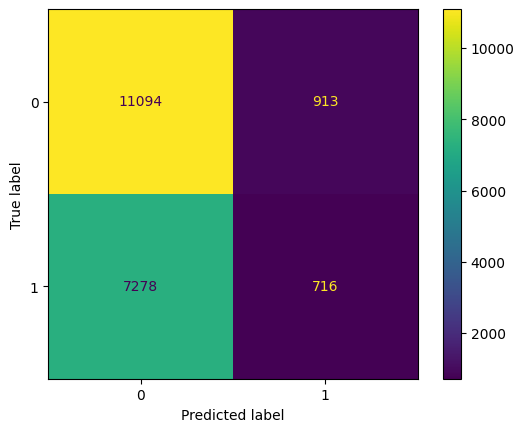

In [19]:
m.ConfusionMatrixDisplay(m.confusion_matrix(test_labels, predictions)).plot()

In [20]:
import pickle
with open('trained_models/gmm.pkl','wb') as f:
    pickle.dump(gmm,f)
print("Model dump complete!")

Model dump complete!
